# Imports

In [202]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error

In [44]:
# build a simple linear regression in python
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
import pandas as pd
import numpy as np

In [4]:
import copy
from copy import deepcopy

In [422]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
from tqdm import tqdm_notebook as tqdm

In [12]:
pd.set_option('display.max_columns', 500)

## Max Rows

In [15]:
pd.set_option('display.max_rows', 200)

In [7]:
import pickle

In [14]:
pd.set_option('display.max_columns', 200)

In [9]:
pd.set_option('display.max_rows', 200)

In [11]:
df = pd.read_csv('final_df2.csv')

In [15]:
df.head()

ticker                         fund_name  div_yield_ttm_real  \
0  AAADX         Aberdeen Income Builder A                2.64   
1  AAAIX  American Century Str Alloc:Agg I                1.40   
2  AAANX    Horizon Active Asset Alloc Inv                0.67   
3  AAAPX           DWS RREEF Real Assets C                1.18   
4  AAAQX           DWS RREEF Real Assets R                1.64   

   30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
0                   1.87                       19.77   
1                   0.00                       18.67   
2                   0.00                       19.03   
3                   0.00                       19.49   
4                   0.00                       19.49   

   weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
0                              3.256                             3.323   
1                              1.783                             2.258   
2                              1.805                             2.683   
3                              2.258                             1.936   
4                              2.258                             1.936   

   weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
0                22.54                 7.50                       1.88   
1                20.58                 7.53                       2.08   
2                24.42                 8.71                       2.19   
3                11.65                 3.93                       3.20   
4                11.65                 3.93                       3.20   

   forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
0                18.09                            0.000   
1                17.29                            0.000   
2                17.37                            1.737   
3                22.59                            0.000   
4                22.59                            0.000   

   forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
0                            0.00           112.0                 5.97   
1                            0.00          1752.0                 3.97   
2                            2.59           156.0                 0.00   
3                            0.00           158.0                 1.69   
4                            0.00           158.0                 1.69   

   bond_yield_to_maturity  effective_duration  avg_coupon  \
0                     5.5               0.000        6.19   
1                     0.0               5.423        3.62   
2                     0.0               0.000        0.00   
3                     0.0               0.000        1.18   
4                     0.0               0.000        1.18   

   avg_credit_score_1_best  bond_average_price  \
0                      0.0              103.88   
1                     11.0              107.56   
2                      0.0                0.00   
3                      0.0                0.00   
4                      0.0                0.00   

   forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
0                            0.00                           0.0   
1                            0.00                           0.0   
2                            9.48                           4.5   
3                            0.00                           0.0   
4                            0.00                           0.0   

   forecasted_cash_flow_growth  forecasted_earnings_growth  \
0                         0.00                        0.00   
1                         0.00                        0.00   
2                        10.79                       12.93   
3                         0.00                        0.00   
4                         0.00                        0.00   

   forecasted_revenue_growth  region_exposure_americas  \
0                       0.00                     96.82   
1                 

In [12]:
df.select_dtypes(exclude=['float64','int64']).columns

Index(['investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1',
       'open_to_new_investors_y', 'fee_12b1', 'inception_date', 'index_fund_y',
       'leverage_y', 'fund_of_funds_y', 'fund_currency_hedged_y',
       'fund_socially_responsible_y', 'fund_available_for_insurance_place_y',
       'comparables_1', 'comparables_2', 'comparables_3', 'comparables_4',
       'comparables_5', 'expense_ratio', 'turnover_ratio', 'holdings',
       'new_holdings'],
      dtype='object')

In [35]:
df.select_dtypes(exclude=['float64','int64']).head()

investment_strategy     equity_style  \
ticker                                                                       
VFIAX   The investment seeks to track the performance ...  Large Cap/Blend   
VTSAX   The investment seeks to track the performance ...  Large Cap/Blend   
FXAIX   The investment seeks to provide investment res...  Large Cap/Blend   
VGTSX   The investment seeks to track the performance ...  Large Cap/Blend   
VITSX   The investment seeks to track the performance ...  Large Cap/Blend   

       fixed_income_style     broad_asset class broad_category  \
ticker                                                           
VFIAX                  --             US Equity         Equity   
VTSAX                  --             US Equity         Equity   
FXAIX                  --             US Equity         Equity   
VGTSX                  --  International Equity         Equity   
VITSX                  --             US Equity         Equity   

              category_name prospectus_objective           fund_family  \
ticker                                                                   
VFIAX           Large Blend               Growth              Vanguard   
VTSAX           Large Blend               Growth              Vanguard   
FXAIX           Large Blend    Growth and Income  Fidelity Investments   
VGTSX   Foreign Large Blend        Foreign Stock              Vanguard   
VITSX           Large Blend               Growth              Vanguard   

                                           benchmark1 fee_12b1  \
ticker                                                           
VFIAX                           S&P 500 TR USD 100.0%       --   
VTSAX              CRSP US Total Market TR USD 100.0%       --   
FXAIX                           S&P 500 TR USD 100.0%       --   
VGTSX   FTSE Global All Cap ex US (USA) NR USD 100.0%       --   
VITSX              CRSP US Total Market TR USD 100.0%       --   

                   inception_date  \
ticker                              
VFIAX   Inception Date 11/13/2000   
VTSAX   Inception Date 11/13/2000   
FXAIX     Inception Date 5/4/2011   
VGTSX    Inception Date 4/29/1996   
VITSX     Inception Date 7/7/1997   

                                       comparables_1  \
ticker                                                 
VFIAX            TISPX TIAA-CREF S&P 500 Index Instl   
VTSAX   VLISX Vanguard Large Cap Index Institutional   
FXAIX         SSEYX State Street Equity 500 Index II   
VGTSX     VDVIX Vanguard Developed Markets Index Inv   
VITSX   VLISX Vanguard Large Cap Index Institutional   

                                       comparables_2  \
ticker                                                 
VFIAX      GEQYX GuideStone Funds Equity Index Instl   
VTSAX   PLFIX Principal Large Cap S&P 500 Index Inst   
FXAIX                    SWPPX Schwab® S&P 500 Index   
VGTSX     ARTKX Artisan International Value Investor   
VITSX   PLFIX Principal Large Cap S&P 500 Index Inst   

                                        comparables_3  \
ticker                                                  
VFIAX                SPIIX SEI S&P 500 Index I (SIMT)   
VTSAX   VITPX Vanguard Instl Ttl Stk Mkt Idx InstlPls   
FXAIX           SWTSX Schwab Total Stock Market Index   
VGTSX             FSPSX Fidelity® International Index   
VITSX   VITPX Vanguard Instl Ttl Stk Mkt Idx InstlPls   

                              comparables_4  \
ticker                                        
VFIAX          DFUSX DFA US Large Company I   
VTSAX   TISPX TIAA-CREF S&P 500 Index Instl   
FXAIX           USPRX USAA 500 Index Reward   
VGTSX    FSGGX Fidelity® Global ex US Index   
VITSX   TISPX TIAA-CREF S&P 500 Index Instl   

                                 comparables_5  \
ticker                                           
VFIAX     VINIX Vanguard Institutional Index I   
VTSAX         VFIAX Vanguard 500 Index Admiral   
FXAIX   BSPPX iShares S&P 500 Index Investor P   
VGTSX               

In [ ]:
df['turnover_ratio'] = df['turnover_ratio'].str.extract('(\-?\d+.\d+)').astype(float)

df['fund_available_for_insurance_place_y'] = df['fund_available_for_insurance_place_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['open_to_new_investors_y'] = df['open_to_new_investors_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['index_fund_y'] =df['index_fund_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_currency_hedged_y'] = df['fund_currency_hedged_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_socially_responsible_y']=df['fund_socially_responsible_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_available_for_insurance_place_y'] = df['fund_available_for_insurance_place_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_of_funds_y'] = df['fund_of_funds_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['leverage_y'] = df['leverage_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['turnover_ratio'] = df['turnover_ratio'].str.extract('(\-?\d+.\d+)').astype(float)

df['expense_ratio'] = df['expense_ratio'].str.extract('(\-?\d+.\d+)').astype(float)

In [ ]:
'investment_strategy', 'equity_style', 'fixed_income_style', 'broad_asset class', 'broad_category', 'category_name', 'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1', 'inception_date', 'comparables_1', 'comparables_2', 'comparables_3', 'comparables_4', 'comparables_5', 'holdings', 'new_holdings'

In [39]:
df1 = deepcopy(df.drop(columns={'investment_strategy', 'equity_style', 'fixed_income_style', 'broad_asset class', 'broad_category', 'category_name', 'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1', 'inception_date', 'comparables_1', 'comparables_2', 'comparables_3', 'comparables_4', 'comparables_5', 'holdings', 'new_holdings'}))

In [40]:
df1.to_csv('final_df1.csv')

In [41]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [154]:
df1.set_index('ticker', inplace=True)

In [86]:
cosine_similarity(df1)

array([[1.        , 0.96513145, 0.96533471, ..., 0.96873017, 0.99309599,
        0.96126458],
       [0.96513145, 1.        , 0.87059743, ..., 0.87032891, 0.93171034,
        0.86034556],
       [0.96533471, 0.87059743, 1.        , ..., 0.98984967, 0.97578895,
        0.97651607],
       ...,
       [0.96873017, 0.87032891, 0.98984967, ..., 1.        , 0.98870496,
        0.99721196],
       [0.99309599, 0.93171034, 0.97578895, ..., 0.98870496, 1.        ,
        0.9866074 ],
       [0.96126458, 0.86034556, 0.97651607, ..., 0.99721196, 0.9866074 ,
        1.        ]])

In [ ]:
similarity_matrix = cosine_similarity(df1)
def recommendations(name, similarity_matrix = similarity_matrix):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similarity_matrix[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df1.index)[i])
        
    return recommended_hotels
recomendations = input("Give a ticker for a fund you own ")
recommendations(recomendations)

In [169]:
similarity_matrix = cosine_similarity(df1)

In [170]:
def recommendations(name, similarity_matrix = similarity_matrix):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similarity_matrix[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df1.index)[i])
        
    return recommended_hotels

In [171]:
recomendations = input("Give a ticker for a fund you own ")
recommendations(recomendations)

Give a ticker for a fund you own MFLDX


['HFMDX',
 'DDFLX',
 'MTPKX',
 'TSCIX',
 'FIODX',
 'GHTIX',
 'CUHCX',
 'DHSIX',
 'RPIBX',
 'JCUIX']

In [168]:
df1.drop(columns= {'risk_score_low_bond_quality', 'risk_score_below_B_over_15p', 'risk_score_yield_2_maturity_low', 'risk_score_duration_high', 'risk_score_preferred_net_over25p', 'stock_sector_rising_interest_rate_bad', 'risk_score_bad_equities_rising_rates', 'risk_score_avg_price_book_high', 'risk_score_avg_price_earnings_high', 'risk_score_smallest_companies', 'risk_score_smallest_companies_over50', 'risk_score_emerging_markets_over_45', 'risk_score_energy_over_15', 'risk_total', 'risk_score_PE_expensive', 'risk_score_PS_expensive', 'risk_score_low_ROE', 'risk_score_duration_long', 'risk_score_low_bond_yields', 'risk_score_risky_bonds', 'risk_score_latam'}, inplace=True)


In [96]:
indices = pd.Series(df1.index)

In [85]:
df1.fillna(0, inplace=True)

In [55]:
df1.drop(columns={'bond_number_of_holdings'}, inplace=True)


In [57]:
df1.dropna(subset= ['region_exposure_japan'], inplace=True)

In [50]:
df1[df1['turnover_ratio'].isna()].head()

div_yield_ttm_real  30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                                          
DFLVX                 1.97                   0.00                      14.250   
DFEVX                 2.68                   0.00                       9.583   
DFISX                 2.39                   0.00                      13.500   
RFETX                 1.47                   1.92                      19.020   
RIRGX                 3.70                   3.29                      17.230   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
DFLVX                              1.1130                            1.6880   
DFEVX                              0.5927                            0.8353   
DFISX                              0.7029                            1.2440   
RFETX                              2.0760                            2.7320   
RIRGX                              1.8820                            2.3370   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
DFLVX                 12.97                 4.80                       2.62   
DFEVX                  9.10                 2.96                       4.40   
DFISX                 12.11                 5.24                       3.21   
RFETX                 22.45                 7.73                       2.47   
RIRGX                 22.16                 6.46                       4.41   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
DFLVX                12.970                           1.0860   
DFEVX                 8.672                           0.5468   
DFISX                13.170                           0.6724   
RFETX                17.250                              NaN   
RIRGX                14.750                              NaN   

        forecasted_price_to_book_ratio  nu_of_holdings  forecasted_ps_ratio  \
ticker                                                                        
DFLVX                           1.6320           328.0                  NaN   
DFEVX                           0.8151          2509.0                  NaN   
DFISX                           1.1800          4458.0                  NaN   
RFETX                              NaN             NaN                1.992   
RIRGX                              NaN          1387.0                1.806   

        stock_forecasted_price_to_book_value  stock_number_of_stock_holdings  \
ticker                                                                         
DFLVX                                    NaN                             NaN   
DFEVX                                    NaN                             NaN   
DFISX                                    NaN                             NaN   
RFETX                                  2.492                             NaN   
RIRGX                                  1.991                           254.0   

        bonds_current_yield  bond_yield_to_maturity  effective_duration  \
ticker                                                                    
DFLVX                   NaN                     NaN                 NaN   
DFEVX                   NaN                     NaN                 NaN   
DFISX                   NaN                     NaN                 NaN   
RFETX                  2.97                    1.81               4.816   
RIRGX                  3.32                    2.08               5.131   

        avg_coupon  avg_credit_score_1_best  bond_average_price  \
ticker                                                            
DFLVX          NaN                      NaN                 NaN   
DFEVX          NaN                      N

In [126]:
df1.reset_index(inplace=True)

In [121]:
df0 = pd.read_csv('zacks_full_banana.csv')

In [131]:
df0 = deepcopy(df0[['Fund Name', 'Ticker']])

In [134]:
df0.rename(columns= {'Fund Name': 'fund_name',  'Ticker':'ticker'}, inplace=True)

In [127]:
df1.head()

ticker  div_yield_ttm_real  30_day_sec_yield_real  \
0  VFIAX                1.88                   1.92   
1  VTSAX                1.71                   1.84   
2  FXAIX                1.79                   0.00   
3  VGTSX                2.82                   0.00   
4  VITSX                1.72                   1.85   

   weighted_avg_pe_ratio_real  weighted_avg_price_to_sales_ratio  \
0                       20.85                              2.227   
1                       20.55                              2.051   
2                       20.32                              2.198   
3                       15.02                              1.154   
4                       20.55                              2.051   

   weighted_avg_price_to_book_ratio  weighted_median_ROE  weighted_median_roa  \
0                             3.220                26.14                 8.99   
1                             3.014                23.25                 7.83   
2                             3.181                26.31                 9.06   
3                             1.547                15.39                 5.76   
4                             3.014                23.25                 7.83   

   forecasted_div_yield_real  forecasted_pe_ratio  \
0                       1.97                18.68   
1                       1.91                18.66   
2                       2.00                18.18   
3                       3.46                14.09   
4                       1.91                18.66   

   forecasted_price_to_sales_ratio  forecasted_price_to_book_ratio  \
0                            2.184                           3.212   
1                            1.981                           2.964   
2                            2.139                           3.134   
3                            1.085                           1.450   
4                            1.981                           2.964   

   nu_of_holdings  bonds_current_yield  bond_yield_to_maturity  \
0           515.0                  0.0                     0.0   
1          3613.0                  0.0                     0.0   
2           509.0                  0.0                     0.0   
3          7407.0                  0.0                     0.0   
4          3613.0                  0.0                     0.0   

   effective_duration  avg_coupon  avg_credit_score_1_best  \
0                 0.0         0.0                      0.0   
1                 0.0         0.0                      0.0   
2                 0.0         0.0                      0.0   
3                 0.0         0.0                      0.0   
4                 0.0         0.0                      0.0   

   bond_average_price  forecasted_5yr_earnings_growth  \
0                 0.0                            9.33   
1                 0.0                            9.52   
2                 0.0                            9.61   
3                 0.0                            7.85   
4                 0.0                            9.52   

   forecasted_book_value_growth  forecasted_cash_flow_growth  \
0                          4.47                        13.10   
1                          4.05                        11.56   
2                          4.48                        13.31   
3                          4.44                         3.48   
4                          4.05                        11.56   

   forecasted_earnings_growth  forecasted_revenue_growth  \
0                       13.82                       7.05   
1                       13.27                       5.52   
2                       14.42                       7.05   
3                        5.38                       3.10   
4                       13.27                       5.52   

   region_exposure_americas  region_exposure_north_america  \
0                     99.04                          99.04   
1                     99.21                         

In [136]:
df2 = pd.merge(df0, df1, how='inner',on='ticker')

In [138]:
df2.set_index('ticker', inplace=True)

In [176]:
df2.shape

(14159, 24118)

In [174]:
df2.to_csv('final_df2.csv')

In [175]:
from annoy import AnnoyIndex

In [ ]:
f = 40
t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed
for i in range(1000):
    v = [random.gauss(0, 1) for z in range(f)]
    t.add_item(i, v)

t.build(10) # 10 trees
t.save('test.ann')

# ...

u = AnnoyIndex(f, 'angular')
u.load('test.ann') # super fast, will just mmap the file
print(u.get_nns_by_item(0, 1000)) # will find the 1000 nearest neighbors

In [178]:
df2[['fund_name', 'div_yield_ttm_real', '30_day_sec_yield_real', 'weighted_avg_pe_ratio_real', 'weighted_avg_price_to_sales_ratio', 'weighted_avg_price_to_book_ratio', 'weighted_median_ROE', 'weighted_median_roa', 'forecasted_div_yield_real', 'forecasted_pe_ratio', 'forecasted_price_to_sales_ratio', 'forecasted_price_to_book_ratio', 'nu_of_holdings', 'bonds_current_yield', 'bond_yield_to_maturity', 'effective_duration', 'avg_coupon', 'avg_credit_score_1_best', 'bond_average_price', 'forecasted_5yr_earnings_growth', 'forecasted_book_value_growth', 'forecasted_cash_flow_growth', 'forecasted_earnings_growth', 'forecasted_revenue_growth', 'region_exposure_americas', 'region_exposure_north_america', 'region_exposure_latin_america', 'region_exposure_greater_europe', 'region_exposure_uk', 'region_exposure_europe_developed', 'region_exposure_europe_emerging', 'region_exposure_africa_middle_east', 'region_exposure_greater_asia', 'region_exposure_japan', 'region_exposure_australiasia', 'region_exposure_asia_developed', 'region_exposure_asia_emerging', 'region_exposure_developed_markets', 'region_exposure_emerging_markets', 'stock_sector_exp_basic_materials', 'stock_sector_exp_communication_service', 'stock_sector_exp_consumer_cycl', 'stock_sector_exp_cons_defensive', 'stock_sector_exp_energy', 'stock_sector_exp_fin_serv', 'stock_sector_exp_healthcare', 'stock_sector_exp_industrial', 'stock_sector_exp_real_estate', 'stock_sector_exp_tech', 'stock_sector_exp_utilities', 'stock_market_cap_giant', 'stock_market_cap_large', 'stock_market_cap_medium', 'stock_market_cap_small', 'stock_market_cap_micro', 'risk_beta', 'risk_sharpe_ratio', 'risk_sortino_ratio', 'risk_daily_VAR', 'risk_monthly_VAR', 'stock_style_exp_lcvalue', 'stock_style_exp_lcblend', 'stock_style_exp_lcgrowth', 'stock_style_exp_mcvalue', 'stock_style_exp_mcblend', 'stock_style_exp_bcgrowth', 'stock_style_exp_scvalue', 'stock_style_exp_smblend', 'stock_style_exp_smgrowth', 'open_to_new_investors_y', 'min_initial_investment', 'fee_actual_mgmt_fee', 'index_fund_y', 'leverage_y', 'fund_of_funds_y', 'fund_currency_hedged_y', 'fund_socially_responsible_y', 'fund_available_for_insurance_place_y', 'total_return_1m', 'total_return_3m', 'total_return_6m', 'total_return_ytd', 'total_return_1y', 'total_return_3y', 'total_return_5y', 'total_return_10y', 'total_return_15y', 'total_return_20y', 'bond_quality_AAA', 'bond_quality_AA', 'bond_quality_A', 'bond_quality_BBB', 'bond_quality_BB', 'bond_quality_B', 'bond_quality_below_B', 'position_cash_net', 'position_cash_long', 'position_cash_short', 'position_stock_net', 'position_stock_long', 'position_stock_short', 'position_bond_net', 'position_bond_long', 'position_bond_short', 'position_convertible_net', 'position_convertible_long', 'position_convertible_short', 'position_preferred_net', 'position_preferred_long', 'position_preferred_short', 'position_other_net', 'position_other_long', 'position_other_short', 'expense_ratio', 'aum', 'share_aum', 'net_asset_value', 'turnover_ratio', 'fund_flows', 'risk_score_low_bond_quality', 'risk_score_below_B_over_15p', 'risk_score_yield_2_maturity_low', 'risk_score_duration_high', 'risk_score_preferred_net_over25p', 'stock_sector_rising_interest_rate_bad', 'risk_score_bad_equities_rising_rates', 'risk_score_avg_price_book_high', 'risk_score_avg_price_earnings_high', 'risk_score_smallest_companies', 'risk_score_smallest_companies_over50', 'risk_score_emerging_markets_over_45', 'risk_score_energy_over_15', 'risk_total', 'risk_score_PE_expensive', 'risk_score_PS_expensive', 'risk_score_low_ROE', 'risk_score_duration_long', 'risk_score_low_bond_yields', 'risk_score_risky_bonds', 'risk_score_latam']]

fund_name  div_yield_ttm_real  \
ticker                                                            
AAADX             Aberdeen Income Builder A                2.64   
AAAIX      American Century Str Alloc:Agg I                1.40   
AAANX        Horizon Active Asset Alloc Inv                0.67   
AAAPX               DWS RREEF Real Assets C                1.18   
AAAQX               DWS RREEF Real Assets R                1.64   
AAARX      American Century Str Alloc:Agg R                0.73   
AAASX               DWS RREEF Real Assets S                2.00   
AAAUX     American Century Str Alloc:Agg R6                1.54   
AAAZX            DWS RREEF Real Assets Inst                2.11   
AABCX    Putnam Dynamic Asset Alloc BalFd C                1.13   
AABPX          American Beacon Balanced Inv                1.52   
AACCX      American Century Str Alloc:Con C                0.76   
AACDX     American Century Str Alloc:Con R6                1.98   
AACIX      American Beacon MidCap Val Instl                1.37   
AACRX      American Century Str Alloc:Con R                1.18   
AADBX         American Beacon Balanced Inst                1.54   
AADCX           Invesco Growth Allocation C                0.44   
AADEX       American Beacon Lg Cap Val Inst                1.88   
AADIX          Invesco Growth Allocation R5                1.50   
AADRX           Invesco Growth Allocation R                0.94   
AADSX           Invesco Growth Allocation S                1.28   
AADYX           Invesco Growth Allocation Y                1.43   
AAGOX            Alger Large Cap Growth I-2                0.00   
AAGPX        American Beacon Lg Cap Val Inv                1.68   
AAIEX          American Beacon Intl Eq Inst                2.17   
AAIFX     Crow Point Alternative Income Inv                0.22   
AAIIX                       Ancora Income I                3.64   
AAIPX           American Beacon Intl Eq Inv                1.81   
AAISX           American Beacon Intl Eq Adv                1.60   
AAMPX                 AllianzGI Micro Cap P                0.00   
AAPEX   Aberdeen AsiaPac(Ex-J)Eqty Inst Svc                1.05   
AAPIX       Aberdeen AsiaPac(Ex-J)Eqty Inst                1.03   
AASOX            Alger Small Cap Growth I-2                0.00   
AASSX        American Beacon Sm Cap Val Adv                0.14   
AATIX         Ancora/Thelen Small Mid-Cap I                0.19   
AAUPX           AllianzGI Ultra Micro Cap P                0.00   
AAZCX                   AB Muni Inc II-AZ C                2.04   
ABAMX       AllianzGI Retirement 2030 Admin                2.30   
ABCCX            American Beacon Balanced C                0.97   
ABCEX                  AB Emg Mks MulAsst C                4.48   
ABCIX   American Beacon London Co Inc EqIns                2.11   
ABCSX                    AB Discovery Val C                0.00   
ABCVX   American Beacon London Co Inc Eq Iv                1.81   
ABCYX    American Beacon London Co Inc Eq Y                2.06   
ABECX    American Beacon London Co Inc Eq C                1.14   
ABEIX      Aberdeen Intermed Muni Inc Instl                3.11   
ABEMX           Aberdeen Emerg Markets Inst                1.26   
ABERX          Aberdeen Intermed Muni Inc R                2.62   
ABESX         Aberdeen Intermed Muni Inc IS                3.10   
ABEYX             American Beacon Intl Eq Y                2.00   
ABHFX   American Funds High Inc Muni Bnd F1                3.40   
ABHIX       American Century High-Yield Inv                4.80   
ABHYX    American Century High Yld Muni Inv                3.56   
ABICX                       AB Intl Value C                0.00   
ABIEX                  AB Emg Mks MulAsst I                5.42   
ABINX           American Century Balanced I                1.65   
ABIYX                     AB Intl Value Adv                0.46   
ABKEX                  AB Emg Mks MulAsst K                5.02   
ABKYX         

In [ ]:
[re.sub(r"\d.?\d*\%","bond",x) for x in new_holdings]

In [183]:
import re

In [ ]:
" ".join(x['holdings']) 

In [192]:
df['holdings']= deepcopy(df['holdings'].apply(lambda x: re.sub(r"\d.?\d*\%","bond",x)))

In [193]:
df['holdings'] = deepcopy(df['holdings'].apply(lambda x: re.sub(r"\d+\/\d+\/\d{2,}","date",x)))

In [194]:
df['holdings'] = deepcopy(df['holdings'].apply(lambda x: re.sub(r"\d{3,}","",x)))

In [230]:
all_holdings = []
for i in tqdm(df['holdings']):
    i.to_list()
#     hold = []
#     print(type(i))
#     print(i, '\n')
#     for j in i:
#         print(j)
#         hold.append(j)
#     all_holdings.append(hold)

AttributeError: 'str' object has no attribute 'to_list'

In [202]:
all_holdings

["['microsoft_corp', 'apple_inc', 'amazon.com_inc', 'facebook_inc_a', 'berkshire_hathaway_inc_b', 'jpmorgan_chase_&_co', 'alphabet_inc_class_c', 'alphabet_inc_a', 'johnson_&_johnson', 'procter_&_gamble_co', 'visa_inc_class_a', 'exxon_mobil_corp', 'at&t_inc', 'bank_of_america_corp', 'the_home_depot_inc', 'intel_corp', 'verizon_communications_inc', 'mastercard_inc_a', 'the_walt_disney_co', 'unitedhealth_group_inc', 'merck_&_co_inc', 'chevron_corp', 'pfizer_inc', 'coca-cola_co', 'wells_fargo_&_co']",
 "['microsoft_corp', 'apple_inc', 'amazon.com_inc', 'facebook_inc_a', 'berkshire_hathaway_inc_b', 'jpmorgan_chase_&_co', 'alphabet_inc_a', 'alphabet_inc_class_c', 'johnson_&_johnson', 'procter_&_gamble_co', 'visa_inc_class_a', 'exxon_mobil_corp', 'at&t_inc', 'bank_of_america_corp', 'the_home_depot_inc', 'intel_corp', 'verizon_communications_inc', 'mastercard_inc_a', 'the_walt_disney_co', 'unitedhealth_group_inc', 'merck_&_co_inc', 'chevron_corp', 'pfizer_inc', 'coca-cola_co', 'wells_fargo_&_c

In [ ]:
df['holdings2'] = all_holdings

In [233]:
df.head()

investment_strategy     equity_style  \
ticker                                                                       
VFIAX   The investment seeks to track the performance ...  Large Cap/Blend   
VTSAX   The investment seeks to track the performance ...  Large Cap/Blend   
FXAIX   The investment seeks to provide investment res...  Large Cap/Blend   
VGTSX   The investment seeks to track the performance ...  Large Cap/Blend   
VITSX   The investment seeks to track the performance ...  Large Cap/Blend   

       fixed_income_style     broad_asset class broad_category  \
ticker                                                           
VFIAX                  --             US Equity         Equity   
VTSAX                  --             US Equity         Equity   
FXAIX                  --             US Equity         Equity   
VGTSX                  --  International Equity         Equity   
VITSX                  --             US Equity         Equity   

              category_name prospectus_objective           fund_family  \
ticker                                                                   
VFIAX           Large Blend               Growth              Vanguard   
VTSAX           Large Blend               Growth              Vanguard   
FXAIX           Large Blend    Growth and Income  Fidelity Investments   
VGTSX   Foreign Large Blend        Foreign Stock              Vanguard   
VITSX           Large Blend               Growth              Vanguard   

                                           benchmark1  div_yield_ttm_real  \
ticker                                                                      
VFIAX                           S&P 500 TR USD 100.0%                1.88   
VTSAX              CRSP US Total Market TR USD 100.0%                1.71   
FXAIX                           S&P 500 TR USD 100.0%                1.79   
VGTSX   FTSE Global All Cap ex US (USA) NR USD 100.0%                2.82   
VITSX              CRSP US Total Market TR USD 100.0%                1.72   

        30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                      
VFIAX                    1.92                       20.85   
VTSAX                    1.84                       20.55   
FXAIX                    0.00                       20.32   
VGTSX                    0.00                       15.02   
VITSX                    1.85                       20.55   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
VFIAX                               2.227                             3.220   
VTSAX                               2.051                             3.014   
FXAIX                               2.198                             3.181   
VGTSX                               1.154                             1.547   
VITSX                               2.051                             3.014   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
VFIAX                 26.14                 8.99                       1.97   
VTSAX                 23.25                 7.83                       1.91   
FXAIX                 26.31                 9.06                       2.00   
VGTSX                 15.39                 5.76                       3.46   
VITSX                 23.25                 7.83                       1.91   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
VFIAX                 18.68                            2.184   
VTSAX                 18.66                            1.981   
FXAIX                 18.18                            2.139   
VGTSX                 14.09                            1.085   
VITSX                 18.66                      

In [234]:
df2.head()

fund_name  div_yield_ttm_real  \
ticker                                                         
AAADX          Aberdeen Income Builder A                2.64   
AAAIX   American Century Str Alloc:Agg I                1.40   
AAANX     Horizon Active Asset Alloc Inv                0.67   
AAAPX            DWS RREEF Real Assets C                1.18   
AAAQX            DWS RREEF Real Assets R                1.64   

        30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                      
AAADX                    1.87                       19.77   
AAAIX                    0.00                       18.67   
AAANX                    0.00                       19.03   
AAAPX                    0.00                       19.49   
AAAQX                    0.00                       19.49   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
AAADX                               3.256                             3.323   
AAAIX                               1.783                             2.258   
AAANX                               1.805                             2.683   
AAAPX                               2.258                             1.936   
AAAQX                               2.258                             1.936   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
AAADX                 22.54                 7.50                       1.88   
AAAIX                 20.58                 7.53                       2.08   
AAANX                 24.42                 8.71                       2.19   
AAAPX                 11.65                 3.93                       3.20   
AAAQX                 11.65                 3.93                       3.20   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
AAADX                 18.09                            0.000   
AAAIX                 17.29                            0.000   
AAANX                 17.37                            1.737   
AAAPX                 22.59                            0.000   
AAAQX                 22.59                            0.000   

        forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
ticker                                                                        
AAADX                             0.00           112.0                 5.97   
AAAIX                             0.00          1752.0                 3.97   
AAANX                             2.59           156.0                 0.00   
AAAPX                             0.00           158.0                 1.69   
AAAQX                             0.00           158.0                 1.69   

        bond_yield_to_maturity  effective_duration  avg_coupon  \
ticker                                                           
AAADX                      5.5               0.000        6.19   
AAAIX                      0.0               5.423        3.62   
AAANX                      0.0               0.000        0.00   
AAAPX                      0.0               0.000        1.18   
AAAQX                      0.0               0.000        1.18   

        avg_credit_score_1_best  bond_average_price  \
ticker                                                
AAADX                       0.0              103.88   
AAAIX                      11.0              107.56   
AAANX                       0.0                0.00   
AAAPX                       0.0                0.00   
AAAQX                       0.0                0.00   

        forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
ticker                                                                 
AAADX                             0.00            

In [237]:
df3 = deepcopy(df2[['fund_name', 'div_yield_ttm_real', '30_day_sec_yield_real', 'weighted_avg_pe_ratio_real', 'weighted_avg_price_to_sales_ratio', 'weighted_avg_price_to_book_ratio', 'weighted_median_ROE', 'weighted_median_roa', 'forecasted_div_yield_real', 'forecasted_pe_ratio', 'forecasted_price_to_sales_ratio', 'forecasted_price_to_book_ratio', 'nu_of_holdings', 'bonds_current_yield', 'bond_yield_to_maturity', 'effective_duration', 'avg_coupon', 'avg_credit_score_1_best', 'bond_average_price', 'forecasted_5yr_earnings_growth', 'forecasted_book_value_growth', 'forecasted_cash_flow_growth', 'forecasted_earnings_growth', 'forecasted_revenue_growth', 'region_exposure_americas', 'region_exposure_north_america', 'region_exposure_latin_america', 'region_exposure_greater_europe', 'region_exposure_uk', 'region_exposure_europe_developed', 'region_exposure_europe_emerging', 'region_exposure_africa_middle_east', 'region_exposure_greater_asia', 'region_exposure_japan', 'region_exposure_australiasia', 'region_exposure_asia_developed', 'region_exposure_asia_emerging', 'region_exposure_developed_markets', 'region_exposure_emerging_markets', 'stock_sector_exp_basic_materials', 'stock_sector_exp_communication_service', 'stock_sector_exp_consumer_cycl', 'stock_sector_exp_cons_defensive', 'stock_sector_exp_energy', 'stock_sector_exp_fin_serv', 'stock_sector_exp_healthcare', 'stock_sector_exp_industrial', 'stock_sector_exp_real_estate', 'stock_sector_exp_tech', 'stock_sector_exp_utilities', 'stock_market_cap_giant', 'stock_market_cap_large', 'stock_market_cap_medium', 'stock_market_cap_small', 'stock_market_cap_micro', 'risk_beta', 'risk_sharpe_ratio', 'risk_sortino_ratio', 'risk_daily_VAR', 'risk_monthly_VAR', 'stock_style_exp_lcvalue', 'stock_style_exp_lcblend', 'stock_style_exp_lcgrowth', 'stock_style_exp_mcvalue', 'stock_style_exp_mcblend', 'stock_style_exp_bcgrowth', 'stock_style_exp_scvalue', 'stock_style_exp_smblend', 'stock_style_exp_smgrowth', 'open_to_new_investors_y', 'min_initial_investment', 'fee_actual_mgmt_fee', 'index_fund_y', 'leverage_y', 'fund_of_funds_y', 'fund_currency_hedged_y', 'fund_socially_responsible_y', 'fund_available_for_insurance_place_y', 'total_return_1m', 'total_return_3m', 'total_return_6m', 'total_return_ytd', 'total_return_1y', 'total_return_3y', 'total_return_5y', 'total_return_10y', 'total_return_15y', 'total_return_20y', 'bond_quality_AAA', 'bond_quality_AA', 'bond_quality_A', 'bond_quality_BBB', 'bond_quality_BB', 'bond_quality_B', 'bond_quality_below_B', 'position_cash_net', 'position_cash_long', 'position_cash_short', 'position_stock_net', 'position_stock_long', 'position_stock_short', 'position_bond_net', 'position_bond_long', 'position_bond_short', 'position_convertible_net', 'position_convertible_long', 'position_convertible_short', 'position_preferred_net', 'position_preferred_long', 'position_preferred_short', 'position_other_net', 'position_other_long', 'position_other_short', 'expense_ratio', 'aum', 'share_aum', 'net_asset_value', 'turnover_ratio', 'fund_flows', 'risk_score_low_bond_quality', 'risk_score_below_B_over_15p', 'risk_score_yield_2_maturity_low', 'risk_score_duration_high', 'risk_score_preferred_net_over25p', 'stock_sector_rising_interest_rate_bad', 'risk_score_bad_equities_rising_rates', 'risk_score_avg_price_book_high', 'risk_score_avg_price_earnings_high', 'risk_score_smallest_companies', 'risk_score_smallest_companies_over50', 'risk_score_emerging_markets_over_45', 'risk_score_energy_over_15', 'risk_total', 'risk_score_PE_expensive', 'risk_score_PS_expensive', 'risk_score_low_ROE', 'risk_score_duration_long', 'risk_score_low_bond_yields', 'risk_score_risky_bonds', 'risk_score_latam']])

In [2]:
df3.head()

NameError: name 'df3' is not defined

In [239]:
pip install juptyer_contrib_nbextensions

  ERROR: Could not find a version that satisfies the requirement juptyer_contrib_nbextensions (from versions: none)
ERROR: No matching distribution found for juptyer_contrib_nbextensions
Note: you may need to restart the kernel to use updated packages.


In [240]:
pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master

     - 29.3MB 6.9MB/s
     |████████████████████████████████| 870kB 4.3MB/s eta 0:00:01
     |████████████████████████████████| 481kB 12.7MB/s eta 0:00:01


  Stored in directory: /private/var/folders/n5/h412g_rx3klg3qzj8pn5pqg00000gn/T/pip-ephem-wheel-cache-nqbv_2ak/wheels/22/4a/9f/df59e985684a10ea0e025300581870b5b3a300ee3525f0eef5
  Stored in directory: /Users/johnrick/Library/Caches/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Stored in directory: /Users/johnrick/Library/Caches/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
Successfully built jupyter-contrib-nbextensions jupyter-latex-envs jupyter-nbextensions-configurator
Note: you may need to restart the kernel to use updated packages.


In [16]:
jupyter contrib nbextension install --user

SyntaxError: invalid syntax (<ipython-input-16-1c0e089b301b>, line 1)

In [4]:
jupyter nbextension install

SyntaxError: invalid syntax (<ipython-input-4-81edf54b5076>, line 1)

In [17]:
import pickle

In [18]:
df.to_pickle("./dummy.pkl")

In [19]:
df.head()

ticker                         fund_name  div_yield_ttm_real  \
0  AAADX         Aberdeen Income Builder A                2.64   
1  AAAIX  American Century Str Alloc:Agg I                1.40   
2  AAANX    Horizon Active Asset Alloc Inv                0.67   
3  AAAPX           DWS RREEF Real Assets C                1.18   
4  AAAQX           DWS RREEF Real Assets R                1.64   

   30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
0                   1.87                       19.77   
1                   0.00                       18.67   
2                   0.00                       19.03   
3                   0.00                       19.49   
4                   0.00                       19.49   

   weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
0                              3.256                             3.323   
1                              1.783                             2.258   
2                              1.805                             2.683   
3                              2.258                             1.936   
4                              2.258                             1.936   

   weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
0                22.54                 7.50                       1.88   
1                20.58                 7.53                       2.08   
2                24.42                 8.71                       2.19   
3                11.65                 3.93                       3.20   
4                11.65                 3.93                       3.20   

   forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
0                18.09                            0.000   
1                17.29                            0.000   
2                17.37                            1.737   
3                22.59                            0.000   
4                22.59                            0.000   

   forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
0                            0.00           112.0                 5.97   
1                            0.00          1752.0                 3.97   
2                            2.59           156.0                 0.00   
3                            0.00           158.0                 1.69   
4                            0.00           158.0                 1.69   

   bond_yield_to_maturity  effective_duration  avg_coupon  \
0                     5.5               0.000        6.19   
1                     0.0               5.423        3.62   
2                     0.0               0.000        0.00   
3                     0.0               0.000        1.18   
4                     0.0               0.000        1.18   

   avg_credit_score_1_best  bond_average_price  \
0                      0.0              103.88   
1                     11.0              107.56   
2                      0.0                0.00   
3                      0.0                0.00   
4                      0.0                0.00   

   forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
0                            0.00                           0.0   
1                            0.00                           0.0   
2                            9.48                           4.5   
3                            0.00                           0.0   
4                            0.00                           0.0   

   forecasted_cash_flow_growth  forecasted_earnings_growth  \
0                         0.00                        0.00   
1                         0.00                        0.00   
2                        10.79                       12.93   
3                         0.00                        0.00   
4                         0.00                        0.00   

   forecasted_revenue_growth  region_exposure_americas  \
0                       0.00                     96.82   
1                 

In [22]:
df2 = pd.read_pickle('./dummy.pkl')

# Load Dataframe for regression

In [8]:
df = pd.read_pickle('df_cleaned_merged.pkl')

## Clean

In [64]:
df.head(2)

holdings  \
ticker                                                      
VFIAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
VTSAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   

                                      investment_strategy     equity_style  \
ticker                                                                       
VFIAX   The investment seeks to track the performance ...  Large Cap/Blend   
VTSAX   The investment seeks to track the performance ...  Large Cap/Blend   

       fixed_income_style broad_asset class broad_category category_name  \
ticker                                                                     
VFIAX                  --         US Equity         Equity   Large Blend   
VTSAX                  --         US Equity         Equity   Large Blend   

       prospectus_objective fund_family                          benchmark1  \
ticker                                                                        
VFIAX                Growth    Vanguard               S&P 500 TR USD 100.0%   
VTSAX                Growth    Vanguard  CRSP US Total Market TR USD 100.0%   

        div_yield_ttm_real  30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                                          
VFIAX                 1.88                   1.92                       20.85   
VTSAX                 1.71                   1.84                       20.55   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
VFIAX                               2.227                             3.220   
VTSAX                               2.051                             3.014   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
VFIAX                 26.14                 8.99                       1.97   
VTSAX                 23.25                 7.83                       1.91   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
VFIAX                 18.68                            2.184   
VTSAX                 18.66                            1.981   

        forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
ticker                                                                        
VFIAX                            3.212           515.0                  0.0   
VTSAX                            2.964          3613.0                  0.0   

        bond_yield_to_maturity  effective_duration  avg_coupon  \
ticker                                                           
VFIAX                      0.0                 0.0         0.0   
VTSAX                      0.0                 0.0         0.0   

        avg_credit_score_1_best  bond_average_price  \
ticker                                                
VFIAX                       0.0                 0.0   
VTSAX                       0.0                 0.0   

        forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
ticker                                                                 
VFIAX                             9.33                          4.47   
VTSAX                             9.52                          4.05   

        forecasted_cash_flow_growth  forecasted_earnings_growth  \
ticker                                                            
VFIAX                         13.10                       13.82   
VTSAX                         11.56                       13.27   

        forecasted_revenue_growth  region_exposure_americas  \
ticker                                                        
VFIAX                        7.05                     99.04   
VTSAX                        5.52                     99.21   

        region_exposure_north_america  

In [ ]:
Index(['holdings', 'investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1',
       'inception_date', 'leverage_y', 'fund_of_funds_y', 'comparables_1',
       'comparables_2', 'comparables_3', 'comparables_4', 'comparables_5'],
      dtype='object')

In [ ]:
df['turnover_ratio'] = df['turnover_ratio'].str.extract('(\-?\d+.\d+)').astype(float)

df['fund_available_for_insurance_place_y'] = df['fund_available_for_insurance_place_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['open_to_new_investors_y'] = df['open_to_new_investors_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['index_fund_y'] =df['index_fund_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_currency_hedged_y'] = df['fund_currency_hedged_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_socially_responsible_y']=df['fund_socially_responsible_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_available_for_insurance_place_y'] = df['fund_available_for_insurance_place_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['fund_of_funds_y'] = df['fund_of_funds_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['leverage_y'] = df['leverage_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

df['turnover_ratio'] = df['turnover_ratio'].str.extract('(\-?\d+.\d+)').astype(float)

df['expense_ratio'] = df['expense_ratio'].str.extract('(\-?\d+.\d+)').astype(float)

In [30]:
df['leverage_y'] = df['leverage_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

In [31]:
df['fund_of_funds_y'] = df['fund_of_funds_y'].apply(lambda x: 1 if x.endswith('Yes') else 0)

In [17]:
df.drop(columns={'fee_performance_fee', 
                 'stock_number_of_stock_holdings',
                 'fee_max_redemption','fee_max_deferred_load','stock_forecasted_price_to_book_value','forecasted_ps_ratio','bond_number_of_holdings','fee_admin_fee'}, inplace=True)


In [66]:
df.to_pickle('final_df_1202.pkl')

In [67]:
df.head()

holdings  \
ticker                                                      
VFIAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
VTSAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
FXAIX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
VGTSX   [Nestle SA, Alibaba Group Holding Ltd ADR, Tai...   
VITSX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   

                                      investment_strategy     equity_style  \
ticker                                                                       
VFIAX   The investment seeks to track the performance ...  Large Cap/Blend   
VTSAX   The investment seeks to track the performance ...  Large Cap/Blend   
FXAIX   The investment seeks to provide investment res...  Large Cap/Blend   
VGTSX   The investment seeks to track the performance ...  Large Cap/Blend   
VITSX   The investment seeks to track the performance ...  Large Cap/Blend   

       fixed_income_style     broad_asset class broad_category  \
ticker                                                           
VFIAX                  --             US Equity         Equity   
VTSAX                  --             US Equity         Equity   
FXAIX                  --             US Equity         Equity   
VGTSX                  --  International Equity         Equity   
VITSX                  --             US Equity         Equity   

              category_name prospectus_objective           fund_family  \
ticker                                                                   
VFIAX           Large Blend               Growth              Vanguard   
VTSAX           Large Blend               Growth              Vanguard   
FXAIX           Large Blend    Growth and Income  Fidelity Investments   
VGTSX   Foreign Large Blend        Foreign Stock              Vanguard   
VITSX           Large Blend               Growth              Vanguard   

                                           benchmark1  div_yield_ttm_real  \
ticker                                                                      
VFIAX                           S&P 500 TR USD 100.0%                1.88   
VTSAX              CRSP US Total Market TR USD 100.0%                1.71   
FXAIX                           S&P 500 TR USD 100.0%                1.79   
VGTSX   FTSE Global All Cap ex US (USA) NR USD 100.0%                2.82   
VITSX              CRSP US Total Market TR USD 100.0%                1.72   

        30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                      
VFIAX                    1.92                       20.85   
VTSAX                    1.84                       20.55   
FXAIX                    0.00                       20.32   
VGTSX                    0.00                       15.02   
VITSX                    1.85                       20.55   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
VFIAX                               2.227                             3.220   
VTSAX                               2.051                             3.014   
FXAIX                               2.198                             3.181   
VGTSX                               1.154                             1.547   
VITSX                               2.051                             3.014   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
VFIAX                 26.14                 8.99                       1.97   
VTSAX                 23.25                 7.83                       1.91   
FXAIX                 26.31                 9.06                       2.00   
VGTSX                 15.39                 5.76                       3.46   
VITSX                 23.25                 7.83                       1.91   

        forecast

## Create Targets

In [ ]:
'position_bond_net', 'risk_sortino_ratio', 'risk_sharpe_ratio', 'risk_beta'

In [304]:
X = df0.drop(columns= {'position_bond_net', 'risk_sortino_ratio', 'risk_sharpe_ratio', 'risk_beta','ticker','holdings', 'investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1',
       'inception_date', 'comparables_1', 'comparables_2', 'comparables_3',
       'comparables_4', 'comparables_5','risk_monthly_VAR','risk_daily_VAR'})

In [305]:
y = df0['risk_monthly_VAR']

In [306]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 4)

In [41]:
df['risk_monthly_VAR'].head()

ticker
VFIAX    13.73
VTSAX    14.14
FXAIX     9.09
VGTSX    13.66
VITSX    13.42
Name: risk_monthly_VAR, dtype: float64

In [27]:
df.set_index('ticker', inplace=True)

In [32]:
df.select_dtypes(exclude=['float64','int64']).columns

Index(['holdings', 'investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1',
       'inception_date', 'comparables_1', 'comparables_2', 'comparables_3',
       'comparables_4', 'comparables_5'],
      dtype='object')

## Initial Model - Linear Regression

In [ ]:
'total_return_3y''risk_daily_VAR'

Text(0.5, 1.0, 'Correlation Plot')

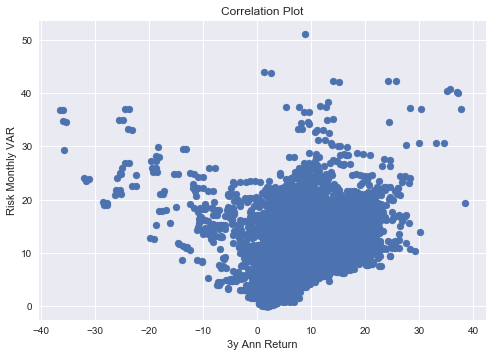

In [48]:
plt.scatter(df.total_return_3y, df.risk_monthly_VAR)
plt.xlabel('3y Ann Return')
plt.ylabel('Risk Monthly VAR')
plt.title('Correlation Plot')

In [45]:
lr_model = ols(formula='total_return_3y~risk_monthly_VAR', data=df).fit()

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_return_3y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     2774.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:52:22   Log-Likelihood:                -43582.
No. Observations:               14328   AIC:                         8.717e+04
Df Residuals:                   14326   BIC:                         8.718e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3335      0.084     51.447      0.000       4.168       4.499
risk_monthly_VAR     0.3851      0.007     52.672      0.000       0.371       0.399
==============================================================================
Omnibus:                     6703.594   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141905.582
Skew:                          -1.753   Prob(JB):                         0.00
Kurtosis:                      18.014   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

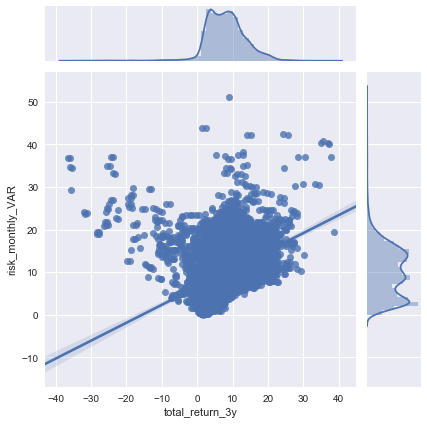

In [49]:
sns.jointplot(df['total_return_3y'], df['risk_monthly_VAR'],kind = 'reg')

In [50]:
# checking for our model - Homoscedasticity
pred_val = lr_model.fittedvalues.copy()
true_val = df['risk_monthly_VAR'].values.copy()
residual = true_val - pred_val

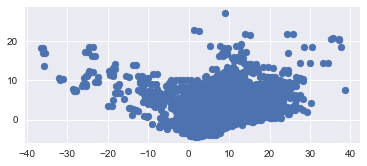

In [51]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(df['total_return_3y'],residual)

((array([-3.89859643, -3.67824008, -3.55747824, ...,  3.55747824,
          3.67824008,  3.89859643]),
  array([-4.31507439, -4.30277614, -4.29662701, ..., 22.57506607,
         22.64885562, 27.03933362])),
 (3.4944261454923025, 1.791219988833054, 0.981101805356564))

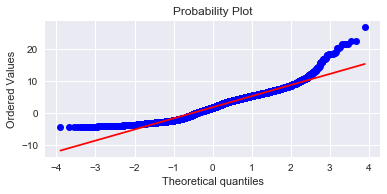

In [53]:
# checking for normality - QQ plot 
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
# r**2
# 0.9523990893322951

# Decision Trees

In [ ]:
train_test_split

In [160]:
import sklearn.model_selection as model_selection

In [198]:
df0 = df.reset_index() 

In [199]:
X = df0.drop(columns= {'ticker','holdings', 'investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1',
       'inception_date', 'comparables_1', 'comparables_2', 'comparables_3',
       'comparables_4', 'comparables_5','risk_monthly_VAR','risk_daily_VAR'})

In [200]:
y = df0['risk_monthly_VAR']

In [203]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 4)

In [162]:
#In this case, X0 refers to hits, and X1 refers to years
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth=2)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

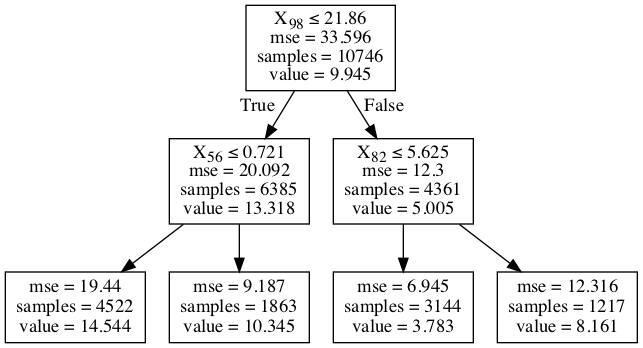

In [163]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [164]:
regPred = regTree.predict(X_test)

In [165]:
mse = mean_squared_error(regPred, y_test)
mse

13.30591697300599

## Try with different depths

In [59]:
#In this case, X0 refers to hits, and X1 refers to years
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth=5)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

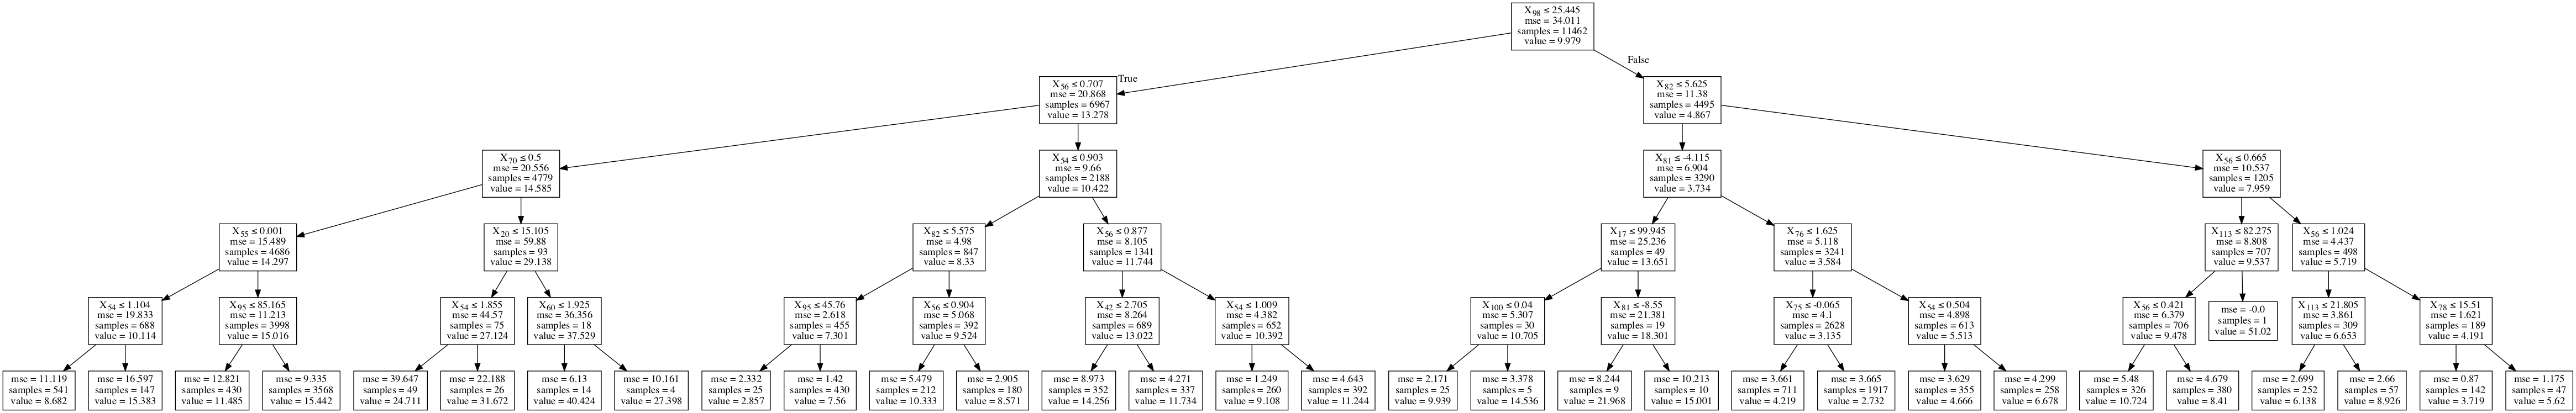

In [60]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [61]:
regPred = regTree.predict(X_test)

In [62]:
mse = mean_squared_error(regPred, y_test)
mse

8.1947902438678

## Discover Best Depth

[-17.649978946000328, -13.746064544240701, -11.087359153455813, -8.76059480784093, -7.345165460508173, -6.302842788576488, -5.580777135871649, -5.184464507232343, -4.893677473043668]


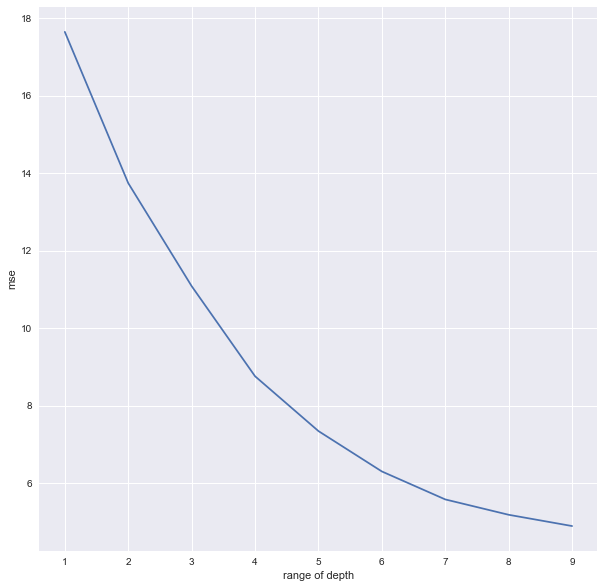

In [102]:
from sklearn.model_selection import cross_val_score
depth_range = range(1,10)
mse = []
for depth in depth_range:
    regtree = DecisionTreeRegressor(max_depth = depth)
    depth_score = cross_val_score(regtree, X, y, scoring = 'neg_mean_squared_error',cv = 6)
    mse.append(depth_score.mean())
print(mse)
mse = [abs(number) for number in mse]
plt.figure(figsize = (10,10))
plt.plot(depth_range, mse)
plt.xlabel('range of depth')
plt.ylabel('mse')
plt.show()

In [204]:
#In this case, X0 refers to hits, and X1 refers to years
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth=7)
# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

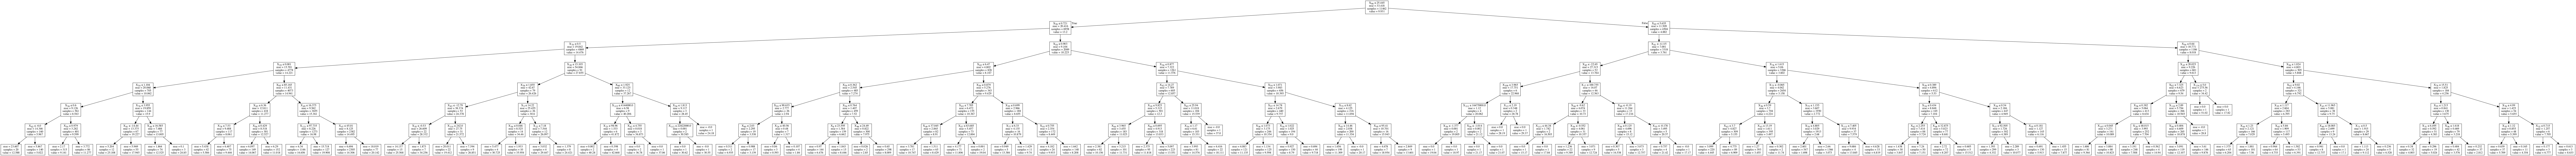

In [205]:
# visualizing the regression tree
dot_data = StringIO()
export_graphviz(regTree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [206]:
regPred = regTree.predict(X_test)

In [222]:
from sklearn.metrics import mean_squared_error

In [225]:
mse = mean_squared_error(y_test, regPred)


In [226]:
rmse = np.sqrt(mse)

In [227]:
rmse

2.3002447290285746

In [244]:
regPred

array([14.30642082,  1.6978245 , 11.01796053, ..., 14.30642082,
        4.75328125,  9.87609589])

In [242]:
[y[2]]

[9.09]

In [248]:
regPred[2]

11.017960526315791

In [250]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [269]:
regPred[5]

14.306420824295031

In [270]:
[list(y_test)[5]]

[14.46]

In [266]:
rmse(np.array(regPred[4]), np.array(list(y_test)[4]))

0.054406631762667246

In [265]:
mean_squared_error([y_test[4]], [regPred[4]])

10.469064444581415

In [232]:
y[2]

9.09

In [238]:
list(9.0)

TypeError: 'float' object is not iterable

In [218]:
regTree.predict([list(X.iloc[0])])

array([8.78953333])

In [219]:
y[2]

9.09

In [138]:
regPred

5.625393939393938

In [177]:
regPred[2580]

5.575570469798659

In [212]:
list(X.iloc[0])

[1.88,
 1.92,
 20.85,
 2.227,
 3.22,
 26.14,
 8.99,
 1.97,
 18.68,
 2.184,
 3.2119999999999997,
 515.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.33,
 4.47,
 13.1,
 13.82,
 7.05,
 99.04,
 99.04,
 0.0,
 0.91,
 0.54,
 0.33,
 0.03,
 0.0,
 0.05,
 0.0,
 0.0,
 0.05,
 0.0,
 99.97,
 0.03,
 2.3,
 10.41,
 9.85,
 7.77,
 4.33,
 15.93,
 14.16,
 9.74,
 3.15,
 18.87,
 3.49,
 55.47,
 34.38,
 10.14,
 0.0,
 0.0,
 0.9999,
 1.121,
 0.7577,
 28.48,
 32.82,
 28.81,
 3.84,
 3.73,
 2.31,
 0.0,
 0.0,
 0.0,
 1.0,
 3000.0,
 0.03,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.66,
 7.22,
 10.17,
 26.67,
 18.29,
 14.88,
 11.0,
 13.34,
 8.98,
 6.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.19,
 0.19,
 0.0,
 99.8,
 99.8,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04,
 505220000000.0,
 300430000000.0,
 287.21,
 4.0,
 9680000000.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 23.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 8.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [208]:
df0.head()

ticker                                           holdings  \
0  VFIAX  [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
1  VTSAX  [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
2  FXAIX  [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
3  VGTSX  [Nestle SA, Alibaba Group Holding Ltd ADR, Tai...   
4  VITSX  [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   

                                 investment_strategy     equity_style  \
0  The investment seeks to track the performance ...  Large Cap/Blend   
1  The investment seeks to track the performance ...  Large Cap/Blend   
2  The investment seeks to provide investment res...  Large Cap/Blend   
3  The investment seeks to track the performance ...  Large Cap/Blend   
4  The investment seeks to track the performance ...  Large Cap/Blend   

  fixed_income_style     broad_asset class broad_category  \
0                 --             US Equity         Equity   
1                 --             US Equity         Equity   
2                 --             US Equity         Equity   
3                 --  International Equity         Equity   
4                 --             US Equity         Equity   

         category_name prospectus_objective           fund_family  \
0          Large Blend               Growth              Vanguard   
1          Large Blend               Growth              Vanguard   
2          Large Blend    Growth and Income  Fidelity Investments   
3  Foreign Large Blend        Foreign Stock              Vanguard   
4          Large Blend               Growth              Vanguard   

                                      benchmark1  div_yield_ttm_real  \
0                          S&P 500 TR USD 100.0%                1.88   
1             CRSP US Total Market TR USD 100.0%                1.71   
2                          S&P 500 TR USD 100.0%                1.79   
3  FTSE Global All Cap ex US (USA) NR USD 100.0%                2.82   
4             CRSP US Total Market TR USD 100.0%                1.72   

   30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
0                   1.92                       20.85   
1                   1.84                       20.55   
2                   0.00                       20.32   
3                   0.00                       15.02   
4                   1.85                       20.55   

   weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
0                              2.227                             3.220   
1                              2.051                             3.014   
2                              2.198                             3.181   
3                              1.154                             1.547   
4                              2.051                             3.014   

   weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
0                26.14                 8.99                       1.97   
1                23.25                 7.83                       1.91   
2                26.31                 9.06                       2.00   
3                15.39                 5.76                       3.46   
4                23.25                 7.83                       1.91   

   forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
0                18.68                            2.184   
1                18.66                            1.981   
2                18.18                            2.139   
3                14.09                            1.085   
4                18.66                            1.981   

   forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
0                           3.212           515.0                  0.0   
1                           2.964          3613.0                  0.0   
2                           3.134           509.0                  0.0   
3                           1.450          7407.0                  0.0   
4                

# Random Forest

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [307]:
tree_clf = DecisionTreeRegressor(criterion='mse', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [308]:
important_features_dict = {}
for x,i in enumerate(tree_clf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: %s' %important_features_list)

Most important features: [95, 79, 67, 92, 78, 73, 49, 42, 93, 75, 20, 72, 44, 90, 5, 32, 106, 11, 17, 19, 107, 36, 50, 0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 74, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [312]:
pos = [95, 79, 67, 92, 78, 73, 49, 42, 93, 75, 20, 72]
colname = X.columns[pos]
print(colname)

Index(['position_bond_long', 'total_return_10y', 'leverage_y',
       'position_stock_net', 'total_return_5y', 'total_return_3m',
       'stock_market_cap_giant', 'stock_sector_exp_energy',
       'position_stock_long', 'total_return_ytd',
       'forecasted_cash_flow_growth', 'total_return_1m'],
      dtype='object')


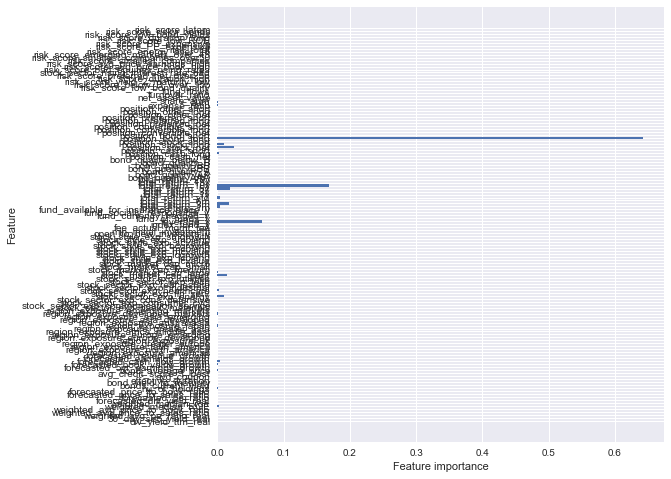

In [313]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

### RF RMSE

In [366]:
df.risk_monthly_VAR.describe()

count    14328.000000
mean         9.960341
std          5.790967
min          0.030000
25%          4.877500
50%          9.770000
75%         14.250000
max         51.020000
Name: risk_monthly_VAR, dtype: float64

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(np.array(regPred[4]), np.array(list(y_test)[4]))

In [315]:
pred = tree_clf.predict(X_test)

In [318]:
rmse(pred,y_test)

2.897090959950895

In [332]:
df0.iloc[9000,:]

ticker                                                                                DUICX
holdings                                  [MASSACHUSETTS ST 5%, PORT AUTH N Y & N J SPL ...
investment_strategy                       The investment seeks as high a level of curren...
equity_style                                                                             --
fixed_income_style                                      Medium Quality/Moderate Sensitivity
broad_asset class                                                            Municipal Bond
broad_category                                                                 Fixed Income
category_name                                                          Muni National Interm
prospectus_objective                                              Municipal Bond - National
fund_family                                                     Delaware Funds by Macquarie
benchmark1                                    BBgBarc Municipal 3-15Y Blend 2-17

In [334]:
len(pred)

2866

In [ ]:
df

In [344]:
[X.iloc[9000,:]]

[div_yield_ttm_real                        2.160000e+00
 30_day_sec_yield_real                     6.700000e-01
 weighted_avg_pe_ratio_real                0.000000e+00
 weighted_avg_price_to_sales_ratio         0.000000e+00
 weighted_avg_price_to_book_ratio          0.000000e+00
 weighted_median_ROE                       0.000000e+00
 weighted_median_roa                       0.000000e+00
 forecasted_div_yield_real                 0.000000e+00
 forecasted_pe_ratio                       0.000000e+00
 forecasted_price_to_sales_ratio           0.000000e+00
 forecasted_price_to_book_ratio            0.000000e+00
 nu_of_holdings                            2.110000e+02
 bonds_current_yield                       4.620000e+00
 bond_yield_to_maturity                    3.170000e+00
 effective_duration                        5.040000e+00
 avg_coupon                                5.090000e+00
 avg_credit_score_1_best                   1.000000e+01
 bond_average_price                        1.155

In [345]:
tree_clf.predict([X.iloc[9000,:]])

array([4.21275466])

In [352]:
np.array(list(y)[9000])

array(3.01)

In [354]:
rmse(tree_clf.predict([X.iloc[10000,:]]), np.array(list(y)[10000]))

1.6856722475900585

In [350]:
np.array(list(y)[9000])

array(3.01)

In [355]:
tree_clf.predict([X.iloc[10000,:]])

array([2.78567225])

In [358]:
np.array(list(y)[10000])

array(1.1)

In [357]:
df[df0.index == 10000]

holdings  \
ticker                                                      
HSDYX   [Us 2yr Note (Cbt) Dec19 Xcbt 20191231, Us 5yr...   

                                      investment_strategy equity_style  \
ticker                                                                   
HSDYX   The investment seeks to provide current income...           --   

                     fixed_income_style broad_asset class broad_category  \
ticker                                                                     
HSDYX   Low Quality/Limited Sensitivity      Taxable Bond   Fixed Income   

          category_name prospectus_objective            fund_family  \
ticker                                                                
HSDYX   Short-Term Bond     Multisector Bond  Hartford Mutual Funds   

                                         benchmark1  div_yield_ttm_real  \
ticker                                                                    
HSDYX   BBgBarc US Govt/Credit 1-3 Yr TR USD 100.0%                 3.2   

        30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                      
HSDYX                    2.33                         0.0   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
HSDYX                                 0.0                               0.0   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
HSDYX                   0.0                  0.0                        0.0   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
HSDYX                   0.0                              0.0   

        forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
ticker                                                                        
HSDYX                              0.0           744.0                 3.26   

        bond_yield_to_maturity  effective_duration  avg_coupon  \
ticker                                                           
HSDYX                     2.62                1.66        3.01   

        avg_credit_score_1_best  bond_average_price  \
ticker                                                
HSDYX                      12.0              102.88   

        forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
ticker                                                                 
HSDYX                              0.0                           0.0   

        forecasted_cash_flow_growth  forecasted_earnings_growth  \
ticker                                                            
HSDYX                           0.0                         0.0   

        forecasted_revenue_growth  region_exposure_americas  \
ticker                                                        
HSDYX                         0.0                     83.74   

        region_exposure_north_america  region_exposure_latin_america  \
ticker                                                                 
HSDYX                           82.83                            0.9   

        region_exposure_greater_europe  region_exposure_uk  \
ticker                                                       
HSDYX                            14.97                3.66   

        region_exposure_europe_developed  region_exposure_europe_emerging  \
ticker                                                                      
HSDYX                              10.65                              0.0   

        region_exposure_africa_middle_east  region_exposure_greater_asia  \
ticker                                                                     
HSDYX                                 0.65                           1.3   

        region_exposure_japan  region_expos

## Bagged Trees

In [360]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [361]:
bagged_tree =  BaggingRegressor(DecisionTreeRegressor(criterion='mse', max_depth=5), 
                                 n_estimators=20)

In [362]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=5,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

In [363]:
bagged_tree.score(X_train, y_train)

0.7920436856417071

In [364]:
bagged_tree.score(X_test, y_test)

0.7824116967809803

In [ ]:
rmse(np.array(regPred[4]), np.array(list(y_test)[4]))

# Multiple Regression

In [178]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [179]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)

In [182]:
X.head()

div_yield_ttm_real  30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                                          
VFIAX                 1.88                   1.92                       20.85   
VTSAX                 1.71                   1.84                       20.55   
FXAIX                 1.79                   0.00                       20.32   
VGTSX                 2.82                   0.00                       15.02   
VITSX                 1.72                   1.85                       20.55   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
VFIAX                               2.227                             3.220   
VTSAX                               2.051                             3.014   
FXAIX                               2.198                             3.181   
VGTSX                               1.154                             1.547   
VITSX                               2.051                             3.014   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
VFIAX                 26.14                 8.99                       1.97   
VTSAX                 23.25                 7.83                       1.91   
FXAIX                 26.31                 9.06                       2.00   
VGTSX                 15.39                 5.76                       3.46   
VITSX                 23.25                 7.83                       1.91   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
VFIAX                 18.68                            2.184   
VTSAX                 18.66                            1.981   
FXAIX                 18.18                            2.139   
VGTSX                 14.09                            1.085   
VITSX                 18.66                            1.981   

        forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
ticker                                                                        
VFIAX                            3.212           515.0                  0.0   
VTSAX                            2.964          3613.0                  0.0   
FXAIX                            3.134           509.0                  0.0   
VGTSX                            1.450          7407.0                  0.0   
VITSX                            2.964          3613.0                  0.0   

        bond_yield_to_maturity  effective_duration  avg_coupon  \
ticker                                                           
VFIAX                      0.0                 0.0         0.0   
VTSAX                      0.0                 0.0         0.0   
FXAIX                      0.0                 0.0         0.0   
VGTSX                      0.0                 0.0         0.0   
VITSX                      0.0                 0.0         0.0   

        avg_credit_score_1_best  bond_average_price  \
ticker                                                
VFIAX                       0.0                 0.0   
VTSAX                       0.0                 0.0   
FXAIX                       0.0                 0.0   
VGTSX                       0.0                 0.0   
VITSX                       0.0                 0.0   

        forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
ticker                                                                 
VFIAX                             9.33                          4.47   
VTSAX                             9.52                          4.05   
FXAIX                             9.61                          4.48   
VGTSX                             7.85                          4.44   
VITSX                             9.52          

In [184]:
X['VFIAX']

KeyError: 'VFIAX'

In [183]:
# make a prediction
ynew = model.predict(X['VGTSX'])

KeyError: 'VGTSX'

In [ ]:
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

# Recommendation System

In [386]:
from sklearn.metrics.pairwise import cosine_similarity

In [400]:
df.select_dtypes(exclude=['float64','int64']).columns

Index(['holdings', 'investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1',
       'inception_date', 'comparables_1', 'comparables_2', 'comparables_3',
       'comparables_4', 'comparables_5'],
      dtype='object')

In [402]:
dfr = df.drop(columns ={'holdings', 'investment_strategy', 'equity_style', 'fixed_income_style',
       'broad_asset class', 'broad_category', 'category_name',
       'prospectus_objective', 'fund_family', 'benchmark1', 'fee_12b1',
       'inception_date', 'comparables_1', 'comparables_2', 'comparables_3',
       'comparables_4', 'comparables_5'})

In [403]:
similarity_matrix = cosine_similarity(dfr)

In [405]:
indices = pd.Series(dfr.index)

In [431]:
def recommendations(name, similarity_matrix = similarity_matrix):
    
    recommended_funds = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similarity_matrix[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_100_indexes = list(score_series.iloc[1:50].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_100_indexes:
        recommended_funds.append(list(dfr.index)[i])
        
    return recommended_funds

In [437]:
recomendations = input("Give a ticker for a fund you own ")
recommendations(recomendations)

Give a ticker for a fund you own MFLDX


['HFMDX',
 'DDFLX',
 'MTPKX',
 'TSCIX',
 'FIODX',
 'GHTIX',
 'CUHCX',
 'DHSIX',
 'RPIBX',
 'JCUIX',
 'TRECX',
 'GXSIX',
 'MGFIX',
 'QSPRX',
 'TNSYX',
 'WFQUX',
 'PLEIX',
 'RCCSX',
 'GEDOX',
 'AUMIX',
 'PSRIX',
 'ABMIX',
 'BLRYX',
 'VGEIX',
 'MGBIX',
 'FGFLX',
 'PDRYX',
 'NLIGX',
 'MFUZX',
 'GMSHX',
 'HJPSX',
 'MIREX',
 'TIVFX',
 'WBLIX',
 'WIISX',
 'NRUBX',
 'GHUCX',
 'AMPAX',
 'QSPIX',
 'MJFOX',
 'HSSIX',
 'HUSIX',
 'VVPSX',
 'ZSCIX',
 'MTNKX',
 'PEMYX',
 'MLPOX',
 'IRHIX',
 'MIZIX']

In [435]:
df.head(1)

holdings  \
ticker                                                      
VFIAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   

                                      investment_strategy     equity_style  \
ticker                                                                       
VFIAX   The investment seeks to track the performance ...  Large Cap/Blend   

       fixed_income_style broad_asset class broad_category category_name  \
ticker                                                                     
VFIAX                  --         US Equity         Equity   Large Blend   

       prospectus_objective fund_family             benchmark1  \
ticker                                                           
VFIAX                Growth    Vanguard  S&P 500 TR USD 100.0%   

        div_yield_ttm_real  30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                                          
VFIAX                 1.88                   1.92                       20.85   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
VFIAX                               2.227                              3.22   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
VFIAX                 26.14                 8.99                       1.97   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
VFIAX                 18.68                            2.184   

        forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
ticker                                                                        
VFIAX                            3.212           515.0                  0.0   

        bond_yield_to_maturity  effective_duration  avg_coupon  \
ticker                                                           
VFIAX                      0.0                 0.0         0.0   

        avg_credit_score_1_best  bond_average_price  \
ticker                                                
VFIAX                       0.0                 0.0   

        forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
ticker                                                                 
VFIAX                             9.33                          4.47   

        forecasted_cash_flow_growth  forecasted_earnings_growth  \
ticker                                                            
VFIAX                          13.1                       13.82   

        forecasted_revenue_growth  region_exposure_americas  \
ticker                                                        
VFIAX                        7.05                     99.04   

        region_exposure_north_america  region_exposure_latin_america  \
ticker                                                                 
VFIAX                           99.04                            0.0   

        region_exposure_greater_europe  region_exposure_uk  \
ticker                                                       
VFIAX                             0.91                0.54   

        region_exposure_europe_developed  region_exposure_europe_emerging  \
ticker                                                                      
VFIAX                               0.33                             0.03   

        region_exposure_africa_middle_east  region_exposure_greater_asia  \
ticker                                                                     
VFIAX                                  0.0                          0.05   

        region_exposure_japan  region_exposure_australiasia  \
ticker                                                        
VFIAX                     0.0                           0.0   

        region_exposur

In [438]:
df.loc[['MFLDX','HFMDX',
 'DDFLX',
 'MTPKX',
 'TSCIX',
 'FIODX',
 'GHTIX',
 'CUHCX',
 'DHSIX',
 'RPIBX',
 'JCUIX',
 'TRECX']][['risk_monthly_VAR','30_day_sec_yield_real','total_return_3y','expense_ratio','risk_total','risk_score_risky_bonds','risk_score_PE_expensive']]

risk_monthly_VAR  30_day_sec_yield_real  total_return_3y  \
ticker                                                             
MFLDX               9.46                   0.00             5.21   
HFMDX              18.24                   0.00             2.32   
DDFLX               1.77                   5.13             4.34   
MTPKX              12.59                   0.00             8.82   
TSCIX              16.45                   0.00            12.46   
FIODX               4.97                   0.00             2.22   
GHTIX              10.49                   0.00            -1.04   
CUHCX               8.73                   0.00             9.01   
DHSIX              15.36                   0.00             4.41   
RPIBX               5.42                   1.20             4.11   
JCUIX               5.56                   0.00            -2.92   
TRECX               4.05                   3.09             6.62   

        expense_ratio  risk_total  risk_score_risky_bonds  \
ticker                                                      
MFLDX            2.46           0                     0.0   
HFMDX            1.31           0                     0.0   
DDFLX            0.69           1                    10.0   
MTPKX            1.00           1                     2.0   
TSCIX            0.98           3                     0.0   
FIODX            1.08           1                     3.0   
GHTIX            1.61           2                     0.0   
CUHCX            1.74           0                     0.0   
DHSIX            0.98           0                     0.0   
RPIBX            0.67           4                     5.0   
JCUIX            1.06           0                     0.0   
TRECX            0.99           2                     8.0   

        risk_score_PE_expensive  
ticker                           
MFLDX                       2.0  
HFMDX                       3.0  
DDFLX                       0.0  
MTPKX                       9.0  
TSCIX                      10.0  
FIODX                       0.0  
GHTIX                       2.0  
CUHCX                       6.0  
DHSIX                       3.0  
RPIBX                       0.0  
JCUIX                       0.0  
TRECX                       0.0

In [421]:
dfr.corr()[abs(dfr.corr()) >= .6]

div_yield_ttm_real  \
div_yield_ttm_real                                     1.0   
30_day_sec_yield_real                                  NaN   
weighted_avg_pe_ratio_real                             NaN   
weighted_avg_price_to_sales_ratio                      NaN   
weighted_avg_price_to_book_ratio                       NaN   
weighted_median_ROE                                    NaN   
weighted_median_roa                                    NaN   
forecasted_div_yield_real                              NaN   
forecasted_pe_ratio                                    NaN   
forecasted_price_to_sales_ratio                        NaN   
forecasted_price_to_book_ratio                         NaN   
nu_of_holdings                                         NaN   
bonds_current_yield                                    NaN   
bond_yield_to_maturity                                 NaN   
effective_duration                                     NaN   
avg_coupon                                             NaN   
avg_credit_score_1_best                                NaN   
bond_average_price                                     NaN   
forecasted_5yr_earnings_growth                         NaN   
forecasted_book_value_growth                           NaN   
forecasted_cash_flow_growth                            NaN   
forecasted_earnings_growth                             NaN   
forecasted_revenue_growth                              NaN   
region_exposure_americas                               NaN   
region_exposure_north_america                          NaN   
region_exposure_latin_america                          NaN   
region_exposure_greater_europe                         NaN   
region_exposure_uk                                     NaN   
region_exposure_europe_developed                       NaN   
region_exposure_europe_emerging                        NaN   
region_exposure_africa_middle_east                     NaN   
region_exposure_greater_asia                           NaN   
region_exposure_japan                                  NaN   
region_exposure_australiasia                           NaN   
region_exposure_asia_developed                         NaN   
region_exposure_asia_emerging                          NaN   
region_exposure_developed_markets                      NaN   
region_exposure_emerging_markets                       NaN   
stock_sector_exp_basic_materials                       NaN   
stock_sector_exp_communication_service                 NaN   
stock_sector_exp_consumer_cycl                         NaN   
stock_sector_exp_cons_defensive                        NaN   
stock_sector_exp_energy                                NaN   
stock_sector_exp_fin_serv                              NaN   
stock_sector_exp_healthcare                            NaN   
stock_sector_exp_industrial                            NaN   
stock_sector_exp_real_estate                           NaN   
stock_sector_exp_tech                                  NaN   
stock_sector_exp_utilities                             NaN   
stock_market_cap_giant                                 NaN   
stock_market_cap_large                                 NaN   
stock_market_cap_medium                                NaN   
stock_market_cap_small                                 NaN   
stock_market_cap_micro                                 NaN   
risk_beta                                              NaN   
risk_sharpe_ratio                                      NaN   
risk_sortino_ratio                                     NaN   
risk_daily_VAR                                         NaN   
risk_monthly_VAR                                       NaN   
stock_style_exp_lcvalue                                NaN   
stock_style_exp_lcblend                                NaN   
stock_style_exp_lcgrowth                               NaN   
stock_style_exp_mcvalue                                NaN   
stock_style_exp_mcblend                                NaN   
stock_styl

## Correlation List

In [ ]:
shape = (50, 4460)

data = np.random.normal(size=shape)

data[:, 1000] += data[:, 2000]

df = pd.DataFrame(data)

c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print so[-4470:-4460]

In [439]:
c = df.corr().abs()

In [441]:
s = c.unstack()

In [442]:
so = s.sort_values(kind="quicksort")

In [448]:
print(so[-4470:-4460])

risk_score_duration_high            bond_yield_to_maturity                0.244227
risk_score_avg_price_earnings_high  risk_monthly_VAR                      0.244239
risk_monthly_VAR                    risk_score_avg_price_earnings_high    0.244239
stock_sector_exp_cons_defensive     risk_score_low_ROE                    0.244531
risk_score_low_ROE                  stock_sector_exp_cons_defensive       0.244531
                                    bond_quality_BB                       0.244591
bond_quality_BB                     risk_score_low_ROE                    0.244591
risk_beta                           stock_market_cap_medium               0.244710
stock_market_cap_medium             risk_beta                             0.244710
30_day_sec_yield_real               region_exposure_latin_america         0.244722
dtype: float64


In [418]:
dfr.shape

(14328, 139)

## Adding Risk Scores

### Cut Bins Define

In [ ]:
bin_labels_5 = [1, 3, 5, 7, 9]
df['quantile_ex_3'] = pd.qcut(df['region_exposure_latin_america'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

In [651]:
def rank(df, columns, bins, label_order):
    return pd.qcut(df[columns], bins=bins, labels = label_order)

In [652]:
rank(df,'stock_sector_exp_utilities', 5, [1,2,4,6,10])

TypeError: qcut() got an unexpected keyword argument 'bins'

In [643]:
def list_of_cuts(column):
    cut_bins= 10
    print((cut_bins), 'bin edges')
    
    cut_labels = [1,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
    print(len(cut_labels), 'bin labels')
    
    return pd.cut(df[column].rank(method='first'),bins= cut_bins, labels = cut_labels)
# pd.qcut(df.rank(method='first'), nbins)
#                   , bins=cut_bins, labels=cut_labels)

In [644]:
list_of_cuts('stock_sector_exp_utilities')

10 bin edges
9 bin labels


ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:

list(df['div_yield_ttm_real'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]))

cut_bins = [-1, 0.1, 0.69, 1.19, 1.62, 1.99, 2.36, 2.78, 3.673000000000011, 315.2]
print(len(cut_bins), 'bin edges')

cut_labels = [1,2,4,5,6,7,8,9,10]
print(len(cut_labels), 'bin labels')

In [ ]:
#stock Sectors rising rates

In [ ]:
df['stock_sector_exp_basic_materials']+
df['stock_sector_exp_cons_defensive']+
df['stock_sector_exp_real_estate']+
df['stock_sector_exp_utilities']


In [549]:
list(df['stock_sector_exp_basic_materials'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]))

[0.0,
 0.0,
 0.0,
 1.07,
 2.52,
 3.67,
 4.408999999999996,
 5.28,
 7.279999999999999,
 100.0]

In [550]:
cut_bins = [
 0.0,
 1.07,
 2.52,
 3.67,
 4.408999999999996,
 5.28,
 7.279999999999999,
 100.0]

print(len(cut_bins), 'bin edges')

cut_labels = [1,2,4,5,6,7,8,9,10]
print(len(cut_labels), 'bin labels')

8 bin edges
9 bin labels


### Rising Interest Rates

In [466]:
df['bond_yield_to_maturity'].describe()

count    14328.000000
mean         1.314146
std          1.938374
min          0.000000
25%          0.000000
50%          0.000000
75%          2.740000
max         32.810000
Name: bond_yield_to_maturity, dtype: float64

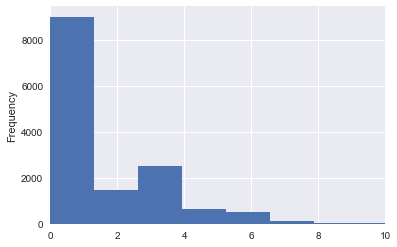

In [465]:
df['bond_yield_to_maturity'].plot.hist(bins=25, xlim=(0,10))

In [478]:
cut_bins = [-1, 0, 1.5, 2, 2.5,3,100]
len(cut_bins)

7

In [481]:
cut_labels = [1,10, 9, 7, 6,4]
len(cut_labels)

6

In [483]:
df['risk_rising_ir_bonds'] = pd.cut(df['bond_yield_to_maturity'], bins=cut_bins, labels=cut_labels)


In [484]:
df['risk_rising_ir_bonds'].value_counts()

1     8972
4     3098
6     1010
7      838
9      357
10      53
Name: risk_rising_ir_bonds, dtype: int64

In [ ]:
#dividend yields
#bond_yield to maturity
#stock Sectors rising rates
#credit quality bad

In [485]:
df.head(2)

holdings  \
ticker                                                      
VFIAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   
VTSAX   [Microsoft Corp, Apple Inc, Amazon.com Inc, Fa...   

                                      investment_strategy     equity_style  \
ticker                                                                       
VFIAX   The investment seeks to track the performance ...  Large Cap/Blend   
VTSAX   The investment seeks to track the performance ...  Large Cap/Blend   

       fixed_income_style broad_asset class broad_category category_name  \
ticker                                                                     
VFIAX                  --         US Equity         Equity   Large Blend   
VTSAX                  --         US Equity         Equity   Large Blend   

       prospectus_objective fund_family                          benchmark1  \
ticker                                                                        
VFIAX                Growth    Vanguard               S&P 500 TR USD 100.0%   
VTSAX                Growth    Vanguard  CRSP US Total Market TR USD 100.0%   

        div_yield_ttm_real  30_day_sec_yield_real  weighted_avg_pe_ratio_real  \
ticker                                                                          
VFIAX                 1.88                   1.92                       20.85   
VTSAX                 1.71                   1.84                       20.55   

        weighted_avg_price_to_sales_ratio  weighted_avg_price_to_book_ratio  \
ticker                                                                        
VFIAX                               2.227                             3.220   
VTSAX                               2.051                             3.014   

        weighted_median_ROE  weighted_median_roa  forecasted_div_yield_real  \
ticker                                                                        
VFIAX                 26.14                 8.99                       1.97   
VTSAX                 23.25                 7.83                       1.91   

        forecasted_pe_ratio  forecasted_price_to_sales_ratio  \
ticker                                                         
VFIAX                 18.68                            2.184   
VTSAX                 18.66                            1.981   

        forecasted_price_to_book_ratio  nu_of_holdings  bonds_current_yield  \
ticker                                                                        
VFIAX                            3.212           515.0                  0.0   
VTSAX                            2.964          3613.0                  0.0   

        bond_yield_to_maturity  effective_duration  avg_coupon  \
ticker                                                           
VFIAX                      0.0                 0.0         0.0   
VTSAX                      0.0                 0.0         0.0   

        avg_credit_score_1_best  bond_average_price  \
ticker                                                
VFIAX                       0.0                 0.0   
VTSAX                       0.0                 0.0   

        forecasted_5yr_earnings_growth  forecasted_book_value_growth  \
ticker                                                                 
VFIAX                             9.33                          4.47   
VTSAX                             9.52                          4.05   

        forecasted_cash_flow_growth  forecasted_earnings_growth  \
ticker                                                            
VFIAX                         13.10                       13.82   
VTSAX                         11.56                       13.27   

        forecasted_revenue_growth  region_exposure_americas  \
ticker                                                        
VFIAX                        7.05                     99.04   
VTSAX                        5.52                     99.21   

        region_exposure_north_america  

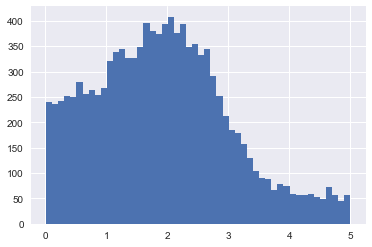

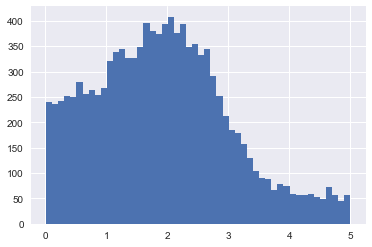

In [509]:
df['div_yield_ttm_real'].hist(bins=50, range=(0.01,5)).figure

In [486]:
df['div_yield_ttm_real'].describe()

count    14328.000000
mean         1.821521
std          3.981746
min          0.000000
25%          0.420000
50%          1.620000
75%          2.560000
max        315.200000
Name: div_yield_ttm_real, dtype: float64

In [514]:
list(df['div_yield_ttm_real'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]))

[0.0, 0.12, 0.69, 1.19, 1.62, 1.99, 2.36, 2.78, 3.673000000000011, 315.2]

In [523]:
cut_bins = [-1, 0.1, 0.69, 1.19, 1.62, 1.99, 2.36, 2.78, 3.673000000000011, 315.2]
print(len(cut_bins), 'bin edges')

cut_labels = [1,2,4,5,6,7,8,9,10]
print(len(cut_labels), 'bin labels')

df['risk_rising_ir_div_equities']= pd.cut(df['div_yield_ttm_real'], bins=cut_bins, labels=cut_labels)


10 bin edges
9 bin labels


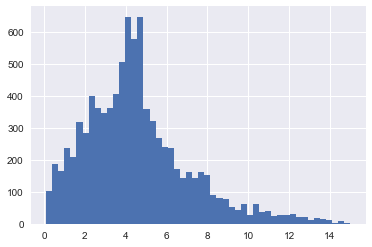

In [544]:
df['stock_sector_exp_basic_materials'].hist(bins=50, range=(0.1,15))


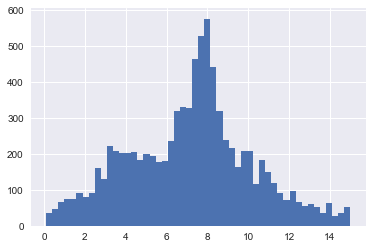

In [543]:
df['stock_sector_exp_cons_defensive'].hist(bins=50, range=(0.1,15))


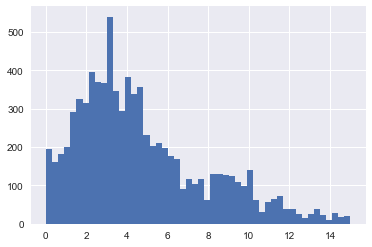

In [542]:
df['stock_sector_exp_real_estate'].hist(bins=50, range=(0.01,15))

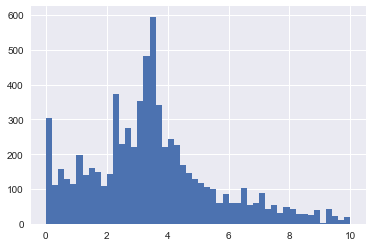

In [546]:
df['stock_sector_exp_utilities'].hist(bins=50, range=(0.01,10))

In [ ]:
df['stock_sector_exp_cons_defensive']

### 20% Drawdown

In [ ]:
#highest avg price to book
#low return on equity
#lowest credit quality
#Credit spreads widening
#Short/ultra long gets hurt

### Credit Bubble

In [ ]:
#Credit spreads widening
#Negative cash


### Currency Risk

### Commodity Risk

### Presidential Election

# Time Series

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [370]:
masax = pd.read_csv('MASAX.csv')

In [374]:
masax = deepcopy(masax[['Date','Adj Close']])

In [378]:
masax.set_index('Date', inplace=True)

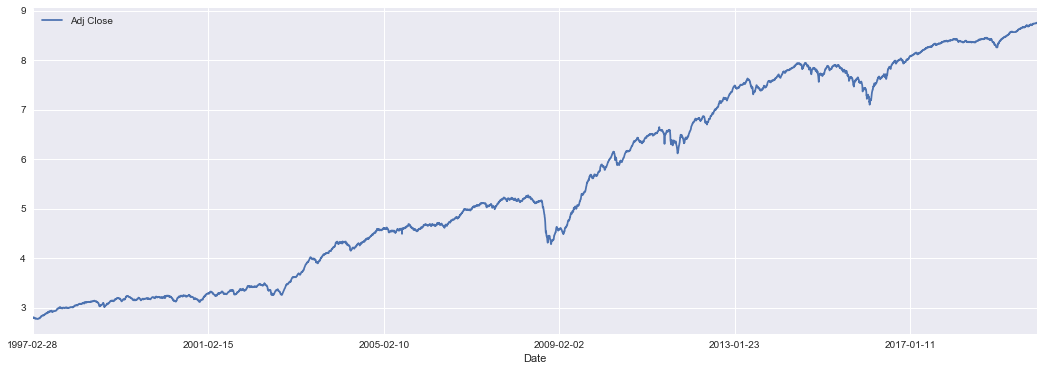

In [379]:
masax.plot(figsize=(18,6))

In [380]:
masax.corr()

Adj Close
Adj Close        1.0

# Cluster

# CNN